In [1]:
import sys
import os
sys.path.append('/Users/zhoupeng/Desktop/Athena')

In [2]:
from athena import Strategy, Backtest
from athena.data import TushareDataHandler
import pandas as pd

In [3]:
from dotenv import load_dotenv
load_dotenv()

tushare_token = os.getenv('tushare_token')

In [4]:
# tushare数据支持
data_handler = TushareDataHandler(start_date='20230101', end_date='20231231', token=tushare_token)

In [11]:
benchmark = data_handler.get_index_prices_from_tushare('399300.SZ')
benchmark

,ts_code,benchmark_net_value
trade_date,,
2023-01-03,399300.SZ,1.000000
2023-01-04,399300.SZ,1.005505
2023-01-05,399300.SZ,1.025040
2023-01-06,399300.SZ,1.028220
2023-01-09,399300.SZ,1.036545
...,...,...
2023-12-25,399300.SZ,0.864607
2023-12-26,399300.SZ,0.858754
2023-12-27,399300.SZ,0.861742


In [12]:
# 获取指数成分
stock_list = data_handler.get_index_list(index_code='000016.SH')
len(stock_list)

59

In [5]:
# 获取价格数据
fields = ['open', 'close']
prices_df = data_handler.get_prices_from_tushare_parallel(['600000.SH', '600519.SH'], fields=fields)
prices_df

开始获取行情数据...
数据获取完成！


600000.SH       600519.SH         
                Open Close      Open    Close
trade_date                                   
2023-01-03      7.27  7.23   1731.20  1730.01
2023-01-04      7.27  7.31   1730.00  1725.01
2023-01-05      7.37  7.35   1737.00  1801.00
2023-01-06      7.35  7.34   1806.12  1803.77
2023-01-09      7.38  7.34   1835.00  1841.20
...              ...   ...       ...      ...
2023-12-25      6.56  6.58   1671.00  1672.00
2023-12-26      6.57  6.56   1672.50  1670.00
2023-12-27      6.56  6.60   1668.00  1667.06
2023-12-28      6.60  6.68   1670.99  1724.99
2023-12-29      6.66  6.62   1720.00  1726.00

[242 rows x 4 columns]

In [5]:
# 获取因子数据
factors_df = data_handler.get_factors_from_tushare_parallel(['600000.SH', '600519.SH'], factors=['total_mv', 'pe'])
factors_df

开始获取因子数据...
数据获取完成！


600000.SH             600519.SH         
                total_mv      pe      total_mv       pe
trade_date                                             
2023-01-03  2.122162e+07  4.0039  2.173235e+08  41.4264
2023-01-04  2.145644e+07  4.0482  2.166954e+08  41.3067
2023-01-05  2.157385e+07  4.0703  2.262412e+08  43.1263
2023-01-06  2.154450e+07  4.0648  2.265892e+08  43.1926
2023-01-09  2.154450e+07  4.0648  2.312911e+08  44.0889
...                  ...     ...           ...      ...
2023-12-25  1.931373e+07  3.7744  2.100363e+08  33.4898
2023-12-26  1.925503e+07  3.7629  2.097850e+08  33.4498
2023-12-27  1.937244e+07  3.7858  2.094157e+08  33.3909
2023-12-28  1.960725e+07  3.8317  2.166929e+08  34.5512
2023-12-29  1.943114e+07  3.7973  2.168197e+08  34.5714

[242 rows x 4 columns]

In [3]:
from athena.data import CryptoDataHandler
from athena.data import resample_to_higher_freq, resample_multi_index_dataframe

data_directory = "/Users/zhoupeng/Desktop/crypto_database/data/15MINS"
data_handler = CryptoDataHandler(start_date='20200101', end_date='20241217')

In [ ]:
prices_df_15min = data_handler.create_prices_dataframe(data_directory, fields=['Open', 'Close'])
prices_df_day = resample_multi_index_dataframe(prices_df_15min, target_freq='1d')

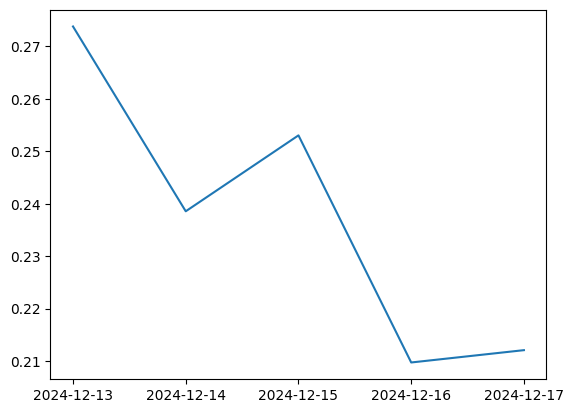

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 对于新上市的币种，它的数据仍然在我们的大表里，只不过没有它的时候它数据全为NaN

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每1天显示一个刻度

data = prices_df_day['VELODROMEUSDT']
data = data.dropna()
plt.plot(data.index, data['Close'])